<a href="https://colab.research.google.com/github/MianUsmanAhmed12/Assignment1/blob/main/provingbiases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#Reading csv file. Fetched data of london police from Dec 2019 to Dec 2020 stop and search data
url="https://raw.githubusercontent.com/MianUsmanAhmed12/Assignment1/main/2020-12-city-of-london-stop-and-search.csv"
df=pd.read_csv(url, header=None)
df.columns=['Type', 'Date', 'Part of a policing operation', 'Policing operation',
       'Latitude', 'Longitude', 'Gender', 'Age range',
       'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation',
       'Object of search', 'Outcome',
       'Outcome linked to object of search Outcome linked to object of search',
       'Removal of more than just outer clothing']
#viewing last five rows
df.tail()

#All code help taken from https://github.com/krishnaik06/EDA1/blob/master/EDA.ipynb


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search Outcome linked to object of search,Removal of more than just outer clothing
1995,Person search,2020-07-31T01:29:56+00:00,NaN,NaN,51.516814,-0.081620,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False
1996,Person search,2020-07-31T02:01:32+00:00,NaN,NaN,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
1997,Person search,2020-07-31T02:01:32+00:00,NaN,NaN,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
1998,Person and Vehicle search,2020-07-31T03:27:44+00:00,NaN,NaN,51.517032,-0.089451,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Khat or Cannabis warning,True,False
1999,Person and Vehicle search,2020-07-31T03:27:44+00:00,NaN,NaN,51.517032,-0.089451,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Khat or Cannabis warning,True,False


In [ ]:
#describing the columnns and rows
df.shape

(223, 15)

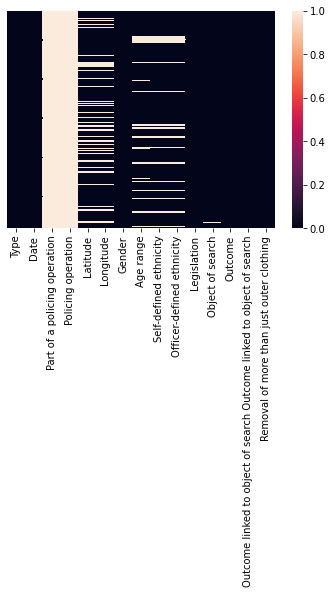

In [ ]:
#Many columns have null values. Graphical idea of how many values are null for specific column
sns.heatmap(df.isnull(),yticklabels=False)

In [ ]:
#viewing percentage of missing values for each and every features so that we can clean the data later.
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]


for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
for feature in features_with_na:
    data = df.copy()
    
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
 

Part of a policing operation 1.0  % missing values
Policing operation 1.0  % missing values
Latitude 0.1883  % missing values
Longitude 0.1883  % missing values
Age range 0.1211  % missing values
Self-defined ethnicity 0.1076  % missing values
Officer-defined ethnicity 0.1076  % missing values


In [ ]:
#viewing the type of data for column type. it will give us idea that what data is concentrated. like we can have data
#that Person search in the incidents was more than person and vehicle search
print(df['Type'].value_counts())


Person search                166
Person and Vehicle search     57
Name: Type, dtype: int64


In [ ]:
print(df['Gender'].value_counts())

Male      203
Female     20
Name: Gender, dtype: int64


In [ ]:
print(df['Object of search'].value_counts())

Controlled drugs                       156
Article for use in theft                32
Stolen goods                            16
Offensive weapons                       12
Evidence of offences under the Act       3
Articles for use in criminal damage      2
Firearms                                 1
Name: Object of search, dtype: int64


In [ ]:
print(df['Self-defined ethnicity'].value_counts())

Other ethnic group - Not stated                                                         93
White - English/Welsh/Scottish/Northern Irish/British                                   29
White - Any other White background                                                      25
Asian/Asian British - Bangladeshi                                                       12
Black/African/Caribbean/Black British - African                                          8
Asian/Asian British - Any other Asian background                                         6
Other ethnic group - Any other ethnic group                                              6
Black/African/Caribbean/Black British - Caribbean                                        6
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background                5
Asian/Asian British - Pakistani                                                          3
Mixed/Multiple ethnic groups - White and Black Caribbean                                 2

In [ ]:
print(df['Officer-defined ethnicity'].value_counts())

White    102
Asian     52
Black     32
Other     13
Name: Officer-defined ethnicity, dtype: int64


In [ ]:
print(df['Legislation'].value_counts())

Misuse of Drugs Act 1971 (section 23)                157
Police and Criminal Evidence Act 1984 (section 1)     65
Firearms Act 1968 (section 47)                         1
Name: Legislation, dtype: int64


In [ ]:
print(df['Outcome'].value_counts())

A no further action disposal       180
Arrest                              21
Khat or Cannabis warning            18
Community resolution                 2
Summons / charged by post            1
Caution (simple or conditional)      1
Name: Outcome, dtype: int64


In [ ]:
print(df['Outcome linked to object of search Outcome linked to object of search'].value_counts())

False    167
True      56
Name: Outcome linked to object of search Outcome linked to object of search, dtype: int64


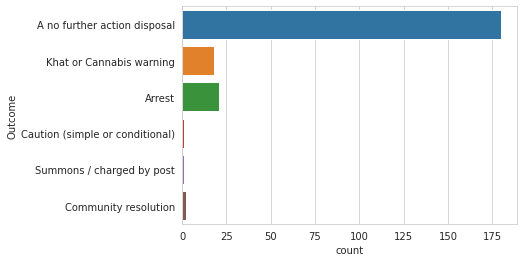

In [ ]:
#Graphical view of what action was taken for any criminal action 
sns.set_style('whitegrid')
sns.countplot(y='Outcome',data=df )





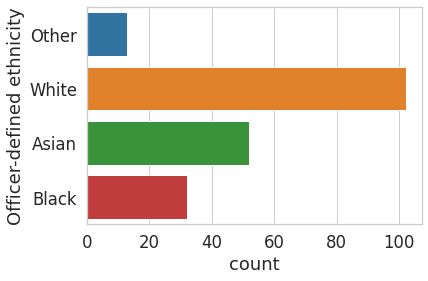

In [ ]:
#to have idea of officer defined ethnicity. it gives us insight that white officer were more than any other
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.countplot(y='Officer-defined ethnicity',data=df )
plt.savefig('officers.png', dpi=300)



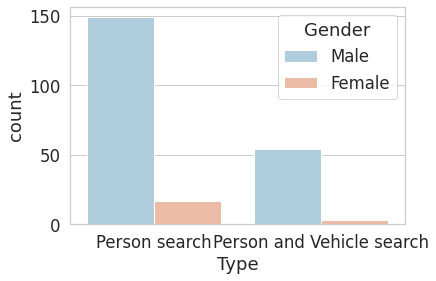

In [ ]:
#count plot to analyze two variable at a time
sns.set_style('whitegrid')
sns.countplot(x='Type',hue='Gender',data=df,palette='RdBu_r')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


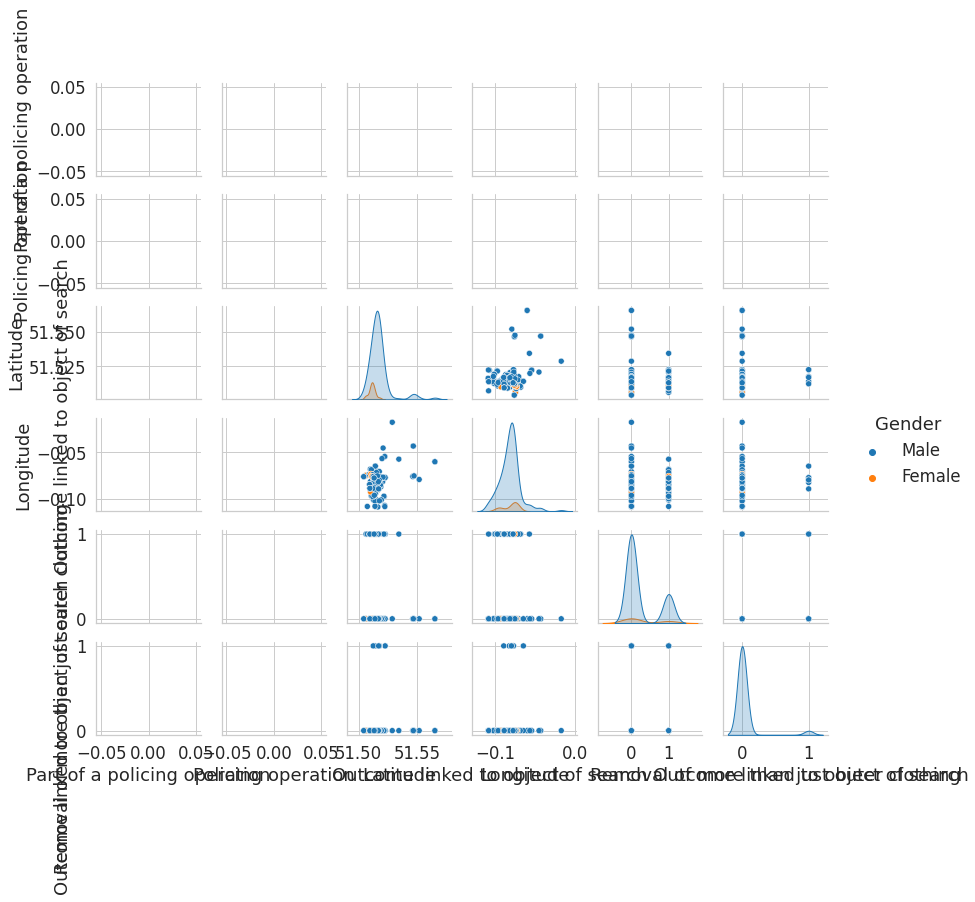

In [ ]:
#We can use pair plot to analyze our data for multivariable 
sns.pairplot(df,hue="Gender",height=2)

In [ ]:
#dividing the data set and then carrying out analysis on tha basis of Outcome columns
df_noaction=df.loc[df['Outcome']=='A no further action disposal']